<a href="https://colab.research.google.com/github/jaejunchoe/HAIDS-Lab/blob/main/Upload_Transnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 준비준비

In [ ]:
## 1번 실행 -> 런타임 다시 시작 -> 2번 실행 -> 3번 실행

## 1번

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,547 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123635 files and dire

In [ ]:
## 2번

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

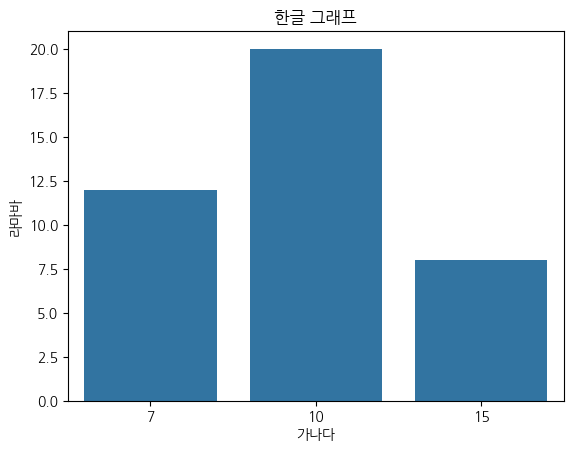

In [ ]:
## 3번

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 나눔고딕 폰트 경로 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
plt.rc('font', family=font_name)

# 그래프 그리기 예시
data = {'가나다': [10, 15, 7], '라마바': [20, 8, 12]}
df = pd.DataFrame(data)
sns.barplot(data=df, x='가나다', y='라마바')
plt.title('한글 그래프')
plt.show()


# 시작

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# 파일 경로
train_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/train.csv'
valid_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/valid.csv'
test_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/test.csv'

# 파일 존재 확인
for file_path in [train_file, valid_file, test_file]:
    if os.path.exists(file_path):
        print(f"{file_path} exists.")
    else:
        print(f"{file_path} is missing!")

# 데이터 내용 확인
for file_path in [train_file, valid_file, test_file]:
    if os.path.exists(file_path):
        df = pd.read_csv(file_path, header=None, names=['userID', 'itemID', 'review', 'rating'])
        print(f"\nContents of {file_path}:")
        print(df.head())


/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/train.csv exists.
/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/valid.csv exists.
/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/test.csv exists.

Contents of /content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/train.csv:
                         userID      itemID  \
0  AFRMDWBD4RXSHKFZUOH6FGVP5I6Q  B07KJJ2DSH   
1  AENNGBGNPATANRDSKCSL5HHBGO4A  B07MGJZ2MH   
2  AG2YFAVEZSNFDWKJGHKCYEHM376A  B08D6W9F21   
3  AGUFZQ2FSNOAEQ3FOQ4PI5G2FCRQ  B08KWLQD46   
4  AHPSOZJQRM54EEZSHNKW63Q22RYA  B0933F8BYP   

                                              review  rating  
0  thoroughly enjoyed month craft project far not...       5  
1  like trying different flavors snacks might lik...       5  
2                 love shirts subscription going get       5  
3  unoriginal variation style cheap projects easi...       3  
4  well made high quality vibrant colors fits wel...       5  

Contents of /content/driv

# Hyperparameter

In [ ]:
# Config 클래스 정의
class Config:
    def __init__(self):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.train_epochs = 15
        self.batch_size = 128
        self.learning_rate = 0.002          # 초기 학습
        self.l2_regularization = 1e-6       # 가중치에 대한 L2 정규화 계
        self.learning_rate_decay = 0.99     # 학습이 진행될수록 학습률을 점진적으로 감소
                                            # 즉, 매 에포크(혹은 특정 단계)마다 학습률이 이전 학습률의 99%로 감소함을 의미합니다.
        self.train_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/train.csv'
        self.valid_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/valid.csv'
        self.test_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/test.csv'
        self.model_file = '/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/T2/best_model.pt'
        self.extension = False
        self.user_count = 15225             # preprocess 상에서의 users 값을 기입해야함
        self.item_count = 641                # preprocess 상에서의 items 값을 기입해야함
        self.review_count = 10               # 최대 리뷰 개수 설정
        self.review_length = 80                  # review 최대 길이
        self.lowest_review_count = 1        ## orignal 2
        self.PAD_WORD = '<UNK>'             # review 길이가 부족한 경우 Padding으로 채움
        self.kernel_count = 100              # Kernel 개수
        self.kernel_size = 3                     # Window size
        self.dropout_prob = 0.5              # Dropout rate
        self.cnn_out_dim = 50                    # Latent Feature dimension

In [ ]:
import time
import pandas as pd
import torch
from torch.nn import functional as F
from torch.utils.data import Dataset


def date(f='%Y-%m-%d %H:%M:%S'):
    return time.strftime(f, time.localtime())


def calculate_mse(model, dataloader, device):
    mse, sample_count = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            user_reviews, item_reviews, reviews, ratings, user_ids, item_ids = [x.to(device) for x in batch]
            latent, predict = model(user_reviews, item_reviews, user_ids, item_ids)
            mse += F.mse_loss(predict, ratings, reduction='sum').item()
            sample_count += len(ratings)
    return mse / sample_count  # mse of dataloader

# Trans Network Dataset Setting

In [ ]:



class TransNetsDataset(Dataset):
    # 초기화 매서드(데이터셋 초기화 및 필요 변수 설정)
    def __init__(self, data_path, word_dict, config):
        self.word_dict = word_dict
        self.r_count = config.review_count
        self.r_length = config.review_length
        self.lowest_r_count = config.lowest_review_count
        self.PAD_WORD_idx = word_dict[config.PAD_WORD]

        ## 데이터 읽기
        df = pd.read_csv(data_path, header=None, names=['userID', 'itemID', 'review', 'rating'])

        ## userID와 itemID를 숫자로 변환
        df['userID'] = df['userID'].astype('category').cat.codes
        df['itemID'] = df['itemID'].astype('category').cat.codes

        ## 리뷰 데이터를 ID로 변환
        df['review'] = df['review'].apply(self._review2id)
        self.null_idx = set()

        ## 사용자 및 아이템 리뷰 생성
        user_reviews = self._get_reviews(df)
        item_reviews = self._get_reviews(df, 'itemID', 'userID')

        ## 리뷰, 평점, 사용자 및 아이템 ID를 텐서로 변환
        reviews = [self._adjust_review_list([x], 1, self.r_length) for x in df['review']]
        reviews = torch.LongTensor(reviews).view(-1, self.r_length)
        rating = torch.Tensor(df['rating'].to_list()).view(-1, 1)
        user_ids = torch.LongTensor(df['userID'].to_list()).view(-1, 1)
        item_ids = torch.LongTensor(df['itemID'].to_list()).view(-1, 1)

        self.user_reviews = user_reviews
        self.item_reviews = item_reviews
        self.reviews = reviews
        self.rating = rating
        self.user_ids = user_ids
        self.item_ids = item_ids

    # 인덱싱 매서드(특정 인덱스에 해당되는 샘플 데이터를 반환)
    def __getitem__(self, idx):
        return self.user_reviews[idx], self.item_reviews[idx], self.reviews[idx], self.rating[idx],\
                self.user_ids[idx], self.item_ids[idx]

    # 길이 메서드(데이터셋 전체 샘플 수를 반환)
    def __len__(self):
        return self.rating.shape[0]

    # 사용자와 아이템 리뷰 생성 메서드 (특정 사용자 또는 아이템과 연관된 리뷰를 반환)
    def _get_reviews(self, df, lead='userID', costar='itemID'):
        reviews_by_lead = dict(list(df[[costar, 'review']].groupby(df[lead])))
        lead_reviews = []
        for idx, (lead_id, costar_id) in enumerate(zip(df[lead], df[costar])):

        ## 관련없는 리뷰만 갖도록 필터링
            df_data = reviews_by_lead[lead_id]
            reviews = df_data['review'][df_data[costar] != costar_id].to_list()

        ## 리뷰 정렬 및 변환
            reviews = self._adjust_review_list(reviews, self.r_count, self.r_length)
            lead_reviews.append(reviews)
        return torch.LongTensor(lead_reviews)


    # 리뷰 리스트 조정 메서드 (일정 개수(10개)와 길이(80개)로 조절)
    def _adjust_review_list(self, reviews, r_count, r_length):
        reviews = reviews[:r_count] + [[self.PAD_WORD_idx] * r_length] * (r_count - len(reviews))  # Certain count.
        reviews = [r[:r_length] + [0] * (r_length - len(r)) for r in reviews]  # Certain length of review.
        return reviews

    # 리뷰를 단어 ID로 변환하는 매서드
    def _review2id(self, review):
        if not isinstance(review, str):  # 리뷰가 문자열인지 확인
            return []  # 문자열이 아니면 빈 리스트 반환
        return [self.word_dict.get(word, self.PAD_WORD_idx) for word in review.split()]



def _review2id(self, review):  # Split a sentence into words, and map each word to a unique number by dict.
    if not isinstance(review, str):
        return []
    wids = []
    for word in review.split():
        if word in self.word_dict:
            wids.append(self.word_dict[word])  # word to unique number by dict.
        else:
            wids.append(self.PAD_WORD_idx)
    return wids


# Model Architecture

3.2.2 CNN Text Processor

In [ ]:
# 모델 정의
import torch
from torch import nn


class CNN(nn.Module):
    def __init__(self, config, word_dim, review_count=1):
        super(CNN, self).__init__()
        self.kernel_count = config.kernel_count
        self.review_count = review_count

        self.conv = nn.Sequential(
            nn.Conv1d(
                in_channels=word_dim,
                out_channels=config.kernel_count,
                kernel_size=config.kernel_size,
                padding=(config.kernel_size - 1) // 2),         # out shape(new_batch_size, kernel_count, review_length)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, config.review_length)),        # out shape(new_batch_size,kernel_count,1)
        )

        self.linear = nn.Sequential(
            nn.Linear(config.kernel_count * self.review_count, config.cnn_out_dim),
            nn.Tanh(),
        )

    def forward(self, vec):                                     # input shape(new_batch_size, review_length, word2vec_dim)
                                                                # (1280,80,64)
        latent = self.conv(vec.permute(0, 2, 1))                # output shape(new_batch_size, kernel_count, 1)
        latent = latent.view(-1, self.kernel_count * self.review_count)
        latent = self.linear(latent)
        return latent                                           # output shape(batch_size, cnn_out_dim)

3.2.3 Dropout Layer and Factorization Machines(FM)

Factorization Machine(FM)

In [ ]:
class FactorizationMachine(nn.Module):
    def __init__(self, in_dim, k):                                 # in_dim=cnn_out_dim
        super(FactorizationMachine, self).__init__()
        self.v = nn.Parameter(torch.full([in_dim, k], 0.001))       # 3.2.5 TransNet-Ext
        self.linear = nn.Linear(in_dim, 1)
        self.linear.weight.data.normal_(mean=0, std=0.001)          # 3.2.5 TransNet-Ext

    def forward(self, x):
        linear_part = self.linear(x)                                # input shape(batch_size, cnn_out_dim), output shape(batch_size, 1)
        inter_part1 = torch.mm(x, self.v)
        inter_part2 = torch.mm(x ** 2, self.v ** 2)
        pair_interactions = torch.sum(inter_part1 ** 2 - inter_part2, dim=1)
        output = linear_part.t() + 0.5 * pair_interactions
        return output.view(-1, 1)                                   # output shape(batch_size, 1)

Source Network

In [ ]:
class SourceNet(nn.Module):
    def __init__(self, config, word_emb, extend_model=False):
        super(SourceNet, self).__init__()
        self.extend_model = extend_model
        self.embedding = nn.Embedding.from_pretrained(torch.Tensor(word_emb))
        self.cnn_u = CNN(config, word_dim=self.embedding.embedding_dim, review_count=config.review_count)           # 3.2.5 TransNet-Ext
        self.cnn_i = CNN(config, word_dim=self.embedding.embedding_dim, review_count=config.review_count)           # 3.2.5 TransNet-Ext
        self.transform = nn.Sequential(
            nn.Linear(config.cnn_out_dim * 2, config.cnn_out_dim),
            nn.Tanh(),
            nn.Linear(config.cnn_out_dim, config.cnn_out_dim),
            nn.Tanh(),
            nn.Dropout(p=config.dropout_prob)
        )

        for m in self.transform.modules():
            if isinstance(m, nn.Linear):
                m.weight.data.normal_(mean=0, std=0.1).clamp_(-1, 1)        # 3.2.4 Transform Hyperparameter
                nn.init.constant_(m.bias.data, 0.1)



        if self.extend_model:
            self.emb_u = nn.Embedding(config.user_count, config.cnn_out_dim, padding_idx=0)
            self.emb_i = nn.Embedding(config.item_count, config.cnn_out_dim, padding_idx=0)
            self.fm = FactorizationMachine(in_dim=config.cnn_out_dim * 3, k=8)
        else:
            self.fm = FactorizationMachine(in_dim=config.cnn_out_dim, k=8)

    def forward(self, user_reviews, item_reviews, user_ids, item_ids):              # shape(batch_size, review_count, review_length)

        new_batch_size = user_reviews.shape[0] * user_reviews.shape[1]
        u_vec = user_reviews.view(new_batch_size, -1)
        i_vec = item_reviews.view(new_batch_size, -1)


        u_vec = self.embedding(user_reviews.view(-1, user_reviews.shape[-1]))
        i_vec = self.embedding(item_reviews.view(-1, item_reviews.shape[-1]))

     ###########################################################

        # Algorithm 3. Testing using TransNet
            ## Step 1. Transform the input

        user_latent = self.cnn_u(u_vec)
        item_latent = self.cnn_i(i_vec)

        concat_latent = torch.cat((user_latent, item_latent), dim=1)
        trans_latent = self.transform(concat_latent)

        if self.extend_model:
            omega_u = self.emb_u(user_ids.view(-1))
            omega_i = self.emb_i(item_ids.view(-1))
            latent = torch.cat([omega_u, omega_i, trans_latent.detach()], dim=1)
            prediction = self.fm(latent)
        else:

     ###########################################################

            # Algorithm 3. Testing using TransNet
                ## Step 2. Predict using the transformed input

            prediction = self.fm(trans_latent.detach())         # Transform 레이어 출력(trans_latent)이 FM에 전달되어 평점 예측
        return trans_latent, prediction

    ###########################################################

    # Algorithm 2. Transform the input

    def trans_param(self):
        return [x for x in self.cnn_u.parameters()] + \
               [x for x in self.cnn_i.parameters()] + \
               [x for x in self.transform.parameters()]

    ###########################################################

Target Network

In [ ]:
class TargetNet(nn.Module):
    def __init__(self, config, word_emb):
        super(TargetNet, self).__init__()
        self.embedding = nn.Embedding.from_pretrained(torch.Tensor(word_emb))
        self.cnn = CNN(config, word_dim=self.embedding.embedding_dim, review_count=1)
        self.fm = nn.Sequential(
            nn.Dropout(config.dropout_prob),                        # Since cnn did not dropout, dropout before FM.
            FactorizationMachine(in_dim=config.cnn_out_dim, k=8)
        )

    def forward(self, reviews):                                     # input shape(batch_size, review_length)
        vec = self.embedding(reviews)
                                                                    # 추가: Embedding 결과 크기 확인
                                                                    # [batch_size, review_length, embedding_dim] = 128,80,64
        cnn_latent = self.cnn(vec)
        prediction = self.fm(cnn_latent)
        return cnn_latent, prediction


# Training and Test Function

3.2.6 Training

In [ ]:
# 학습 및 테스트 함수
def train(train_dataloader, valid_dataloader, model_S, model_T, config, model_path):
    print(f'{date()}## Start the training!')
    train_mse = calculate_mse(model_S, train_dataloader, config.device)
    valid_mse = calculate_mse(model_S, valid_dataloader, config.device)
    print(f'{date()}#### Initial train mse {train_mse:.6f}, validation mse {valid_mse:.6f}')
    start_time = time.perf_counter()

    opt_S = torch.optim.Adam(model_S.parameters(), config.learning_rate, weight_decay=config.l2_regularization)
    opt_trans = torch.optim.Adam(model_S.trans_param(), config.learning_rate, weight_decay=config.l2_regularization)
    opt_T = torch.optim.Adam(model_T.parameters(), config.learning_rate, weight_decay=config.l2_regularization)
    lr_sch_S = torch.optim.lr_scheduler.ExponentialLR(opt_S, config.learning_rate_decay)
    lr_sch_trans = torch.optim.lr_scheduler.ExponentialLR(opt_trans, config.learning_rate_decay)
    lr_sch_T = torch.optim.lr_scheduler.ExponentialLR(opt_T, config.learning_rate_decay)

    best_loss, batch_step = 100, 0
    model_T.train()
    for epoch in range(config.train_epochs):
        model_S.train()
        total_loss, total_samples = 0, 0
        for batch in train_dataloader:
            user_reviews, item_reviews, reviews, ratings, user_ids, item_ids = [x.to(config.device) for x in batch]

    ###########################################################

            # Algorithm 1. Training Transnet

                ## Step 1. Train Target Network on the actual review
            latent_T, pred_T = model_T(reviews)
            loss_T = F.l1_loss(pred_T, ratings)
            opt_T.zero_grad()
            loss_T.backward()

                ## Step 2. Learn to Transform
            latent_S, pred_S = model_S(user_reviews, item_reviews, user_ids, item_ids)
            loss_trans = F.mse_loss(latent_S, latent_T.detach())
            opt_trans.zero_grad()
            loss_trans.backward()

                ## Step 3. Train a predictor on the transform input
            loss_S = F.l1_loss(pred_S, ratings, reduction='sum')
            opt_S.zero_grad()
            loss_S.backward()

            opt_T.step()
            opt_trans.step()
            opt_S.step()

            batch_step += 1
            total_loss += loss_S.item()         # summing over all loss of source network
            total_samples += len(pred_S)

            if batch_step % 500 == 0:           # valid per 500 steps
                model_S.eval()
                valid_mse = calculate_mse(model_S, valid_dataloader, config.device)
                if best_loss > valid_mse:
                    best_loss = valid_mse
                    torch.save(model_S, model_path)
                print(f"{date()}###### Step {batch_step:3d}; validation mse {valid_mse:.6f}")
                model_S.train()

        lr_sch_S.step()
        lr_sch_trans.step()
        lr_sch_T.step()
        valid_mse = calculate_mse(model_S, valid_dataloader, config.device)
        if best_loss > valid_mse:
            best_loss = valid_mse
            torch.save(model_S, model_path)
        print(f"{date()}#### Epoch {epoch:3d}; train mse {total_loss/total_samples:.6f}; validation mse {valid_mse:.6f}")

    print(f'{date()}## End of training!')

###########################################################

# Algorithm 3. Testing using TransNet
    ## Step 3. Final Calculation

def test(dataloader, best_model, config):
    print(f'{date()}## Start the testing!')
    test_loss = calculate_mse(best_model, dataloader, config.device)
    print(f"{date()}## Test end, test mse is {test_loss:.6f}")

###########################################################

best model = SourceNet과 TargetNet에서 Transform Layer를 통해 도출된 잠재특성(latent)의 표현


TargetNet은 평점과 고객이 동시에 존재하는 경우이기에 CNN과 Factorization Machine(FM)으로 평점 예측 수행함.

**SourceNet는 forward Function에 기재되어있다.**

user_latent = self.cnn_u(u_vec)

item_latent = self.cnn_i(i_vec)

concat_latent = torch.cat((user_latent, item_latent), dim=1)

trans_latent = self.transform(concat_latent)

# Test and Result

In [ ]:
import torch
import inspect
import os
import pickle
import pandas as pd
import time
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

Word Embedding과 Dictionary pickle file 경로 확인

In [ ]:



# 파일 경로 확인
assert os.path.exists('/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/word_emb.pkl'), "word_emb.pkl not found"
assert os.path.exists('/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/dict.pkl'), "dict.pkl not found"


In [ ]:
# 실행부
if __name__ == '__main__':
    config = Config()
    print(config)

    # 파일 경로 확인
    assert os.path.exists(config.train_file), "Train file not found"
    assert os.path.exists(config.valid_file), "Valid file not found"
    assert os.path.exists(config.test_file), "Test file not found"

    print("## Load word2vec and data...")
    word_emb = pickle.load(open('/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/word_emb.pkl', 'rb'), encoding='iso-8859-1')
    word_dict = pickle.load(open('/content/drive/MyDrive/IDS/amaxon reviews 2023/Transnet/dict.pkl', 'rb'), encoding='iso-8859-1')

    # 데이터셋 생성
    train_dataset = TransNetsDataset(config.train_file, word_dict, config)
    valid_dataset = TransNetsDataset(config.valid_file, word_dict, config)
    test_dataset = TransNetsDataset(config.test_file, word_dict, config)

    # 데이터셋 크기 출력
    print(f"Train dataset size: {len(train_dataset)}")
    print(f"Valid dataset size: {len(valid_dataset)}")
    print(f"Test dataset size: {len(test_dataset)}")

    # 데이터 로더 생성
    train_dlr = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
    valid_dlr = DataLoader(valid_dataset, batch_size=config.batch_size, shuffle=True)
    test_dlr = DataLoader(test_dataset, batch_size=config.batch_size, shuffle=True)

    source_model = SourceNet(config, word_emb, extend_model=config.extension).to(config.device)
    target_model = TargetNet(config, word_emb).to(config.device)

    os.makedirs(os.path.dirname(config.model_file), exist_ok=True)

    train(train_dlr, valid_dlr, source_model, target_model, config, config.model_file)
    test(test_dlr, torch.load(config.model_file), config)


## Load word2vec and data...
Train dataset size: 12795
Valid dataset size: 1599
Test dataset size: 1600
2024-12-19 10:55:57## Start the training!
2024-12-19 10:55:58#### Initial train mse 17.205638, validation mse 17.108458
2024-12-19 10:55:59#### Epoch   0; train mse 2.306171; validation mse 3.650761
2024-12-19 10:56:00#### Epoch   1; train mse 1.568476; validation mse 3.483900
2024-12-19 10:56:01#### Epoch   2; train mse 1.524776; validation mse 3.353805
2024-12-19 10:56:02#### Epoch   3; train mse 1.492822; validation mse 3.248811
2024-12-19 10:56:03###### Step 500; validation mse 2.477248
2024-12-19 10:56:03#### Epoch   4; train mse 1.484235; validation mse 3.192119
2024-12-19 10:56:04#### Epoch   5; train mse 1.459969; validation mse 3.300853
2024-12-19 10:56:05#### Epoch   6; train mse 1.428232; validation mse 3.157721
2024-12-19 10:56:06#### Epoch   7; train mse 1.414320; validation mse 3.043463
2024-12-19 10:56:07#### Epoch   8; train mse 1.396352; validation mse 3.021115
2024-

<ipython-input-13-09779ddf4eda>:36: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  test(test_dlr, torch.load(config.model_file), config)
